본 강좌에서는 딥러닝 모델 학습과정과 어떻게 데이터셋을 구성하는 지에 대해서 알아보겠습니다. 딥러닝을 공부할수록 딥러닝 모델이 학습하는 과정이 사람이 학습하는 과정과 유사하다는 느낌을 많이 받습니다. 딥러닝 학습과정을 이해하기 위해 우리가 수능 공부하는 것에 비유를 들어보겠습니다.

---

## 학습과정 이야기

케라스에서 만든 모델을 학습할 때는 fit()함수를 사용합니다. 

    model.fit(x, y, batch_size=32, epochs=10)

주요인자는 다음과 같습니다. 
- x : 입력 데이터
- y : 라벨 값
- batch_size : 몇 개의 샘플로 가중치를 갱신할 것인지 지정
- epochs : 학습 반복 횟수

학습에 관련된 인자이므로 시험 공부하는 것에 비유를 해보겠습니다. 먼저 모의고사 1회분을 가지고 학습해봅시다. 이 1회분은 100문항이 있고, 해답지도 제공합니다. 문제를 푼 뒤 해답지와 맞춰보면서 학습이 이루어지기 때문에 해답지가 없으면 학습이 안 됩니다. 

![img](http://tykimos.github.com/Keras/warehouse/2017-3-25-Dataset_and_Fit_Talk_batch0.png)

위의 주요인자은 다음과 같이 비유할 수 있습니다. 

### x
100문항의 문제들입니다.

### y
100문항의 답들입니다.

### batch_size(배치사이즈)
배치사이즈는 몇 문항을 풀고 해답을 맞추는 지를 의미합니다. 100문항일 때, 배치사이즈가 100이면 전체를 다 풀고 난 뒤에 해답을 맞춰보는 것입니다. 우리가 해답을 맞춰볼 때 '아하, 이렇게 푸는구나'라고 느끼면서 학습하는 것처럼 모델도 이러한 과정을 통해 가중치가 갱신됩니다. 

    문제를 푼 뒤 해답과 맞춰봐야 학습이 일어납니다. > 모델의 결과값과 주어진 라벨 값과의 오차를 줄이기 위해, `역전파(Backpropagation)` 알고리즘으로 가중치가 갱신됩니다.

전체 문제를 푼 뒤 해답과 맞추므로 이 때 가중치 갱신은 한 번만 일어납니다. 

![img](http://tykimos.github.com/Keras/warehouse/2017-3-25-Dataset_and_Fit_Talk_batch1.png)

배치사이즈가 10이면 열 문제씩 풀어보고 해답 맞춰보는 것입니다. 100문항을 10문제씩 나누어서 10번 해답을 맞추므로 가중치 갱신은 10번 일어납니다.

![img](http://tykimos.github.com/Keras/warehouse/2017-3-25-Dataset_and_Fit_Talk_batch2.png)

배치사이즈가 1이면 한 문제 풀고 해답 맞춰보고 또 한 문제 풀고 맞춰보고 하는 것입니다. 한 문제를 풀 때마다 가중치 갱신이 일어나므로 횟수는 100번입니다.

![img](http://tykimos.github.com/Keras/warehouse/2017-3-25-Dataset_and_Fit_Talk_batch3.png)

100문제 다 풀고 해답을 맞히는 것과 1문제씩 풀고 해답을 맞히는 것은 어떤 차이가 있을까요? 언뜻 생각해서는 별 반 차이가 없어 보입니다. 하지만 모의고사 1회분에 비슷한 문항이 있다고 가정했을 때, 배치사이즈가 100일 때는 다 풀어보고 해답을 맞춰보기 때문에 한 문제를 틀릴 경우 이후 유사 문제를 모두 틀릴 경우가 많습니다. 배치사이즈가 1인 경우에는 한 문제씩 풀어보고 해답을 맞춰보기 때문에 유사문제 중 첫 문제를 틀렸다고 하더라도 해답을 보면서 학습하게 되므로 나머지 문제는 맞추게 됩니다. 자 그럼 이 배치사이즈가 어떨 때 학습효과가 좋을까요? 사람이 학습하는 것이랑 비슷합니다. 100문항 다 풀고 해답과 맞추어보려면 문제가 무엇이었는지 다 기억을 해야 맞춰보면서 학습이 되겠죠? 기억력(용량)이 커야합니다. 1문항씩 풀고 해답 맞추면 학습은 꼼꼼히 잘 되겠지만 시간이 너무 걸리겠죠? 그리고 해답지를 보다가 다음 문제의 답을 봐버리는 불상사가 생기겠죠(이것은 컴퓨터에서는 일어나지 않는 일입니다).

    배치사이즈가 작을수록 가중치 갱신이 자주 일어납니다.

### epchos(에포크)

에포크는 모의고사 1회분을 몇 번 풀어볼까 입니다. 즉 100문항의 문제들을 몇 번이나 반복해서 풀어보는 지 정하는 것입니다. 에포크가 20이면 모의고사 1회분을 20번 푸는 것입니다. 처음에는 같은 문제를 반복적으로 풀어보는 것이 무슨 효과가 있는 지 의문이 들었지만 우리가 같은 문제집을 여러 번 풀면서 점차 학습되듯이 모델도 같은 데이터셋으로 반복적으로 가중치를 갱신하면서 모델이 학습됩니다. 같은 문제라도 이전에 풀었을 때랑 지금 풀었을 때랑 학습상태(가중치)가 다르기 때문에 다시 학습이 일어납니다. 

    같은 문제집이라도 반복해서 풀면 학습이 일어납니다.

아래 그래프에서 세로축이 100문항 중 틀린 개수이고, 가로축이 모의고사 풀이 반복횟수입니다. 풀이를 반복할수록 틀린 개수가 적어지는 것을 보실 수 있습니다. 처음에는 틀린 개수가 확 적어지만 반복이 늘어날수록 완만하게 틀린 개수가 줄어듭니다. 우리가 공부할 때도 낮은 점수에서는 공부를 조금하면 점수가 확 오르지만, 높은 점수에서 1~2점 올리는 것이 쉽지 않은 것과 비슷할 수 있습니다.

![plot](http://tykimos.github.com/Keras/warehouse/2017-3-25-Dataset_and_Fit_Talk_plot1.png)

모의고사 1회분을 20번 푸는 것과 서로 다른 모의고사 20회분을 1번 푸는 것과는 어떤 차이가 있을까요? 이것은 분야에 따라 데이터특성에 따라 다를 것이라고 생각합니다. 잡다한 문제를 많이 푸는 것보다 양질의 문제를 여러 번 푸는 것이 도움이 된다고 생각합니다. 피아노를 배울 때도 기본 곡을 반복적으로 학습하면 다양한 악보도 쉽게 보는 반면 이곡 저곡 연습하면 제대로 익히기 쉽지 않습니다. 이런 문제를 제외하고도 현실적으로 데이터를 구하기가 쉽지 않기 때문에 제한된 데이터셋으로 반복적으로 학습하는 것이 효율적입니다. 

그럼 이 에포크를 무조건 늘리면 좋을까요? 하나의 문제집만 계속 학습하면 오히려 역효과가 발생할 수 있습니다. 피아노 칠 때 처음에 곡을 연습할 때는 악보를 보면서 치다가 다음엔 악보안보고도 치고, 나중엔 눈감고도 칩니다. 눈감고만 치다보면 악보 보는 법을 까먹게 되고 다른 곡을 치지 못하는 지경에 이릅니다. 연습한 곡은 완벽하게 칠 지 몰라도 다른 곡은 치지 못하는 상태가 됩니다. 우린 이것을 `오버피팅(overfitting)`이라고 부릅니다. 악보보고 잘 치는 정도에서 그만 연습하는 것이 더 좋았을 수 있습니다. 실제로 모델을 학습할 때도 오버피팅이 일어나는 지 체크하다가 조짐이 보이면 학습을 중단합니다.

    과유불급

---

## 데이터셋 이야기

이번에는 데이터셋을 어떻게 구성하고 모델을 어떻게 검증할 지 알아보겠습니다.

당신이 고등학교 담임선생님이고 수능 볼 학생이 3명이 있다고 가정을 해봅시다. 이 세 명 중 누가 수능을 가장 잘 볼지 알아 맞혀보도록 하겠습니다. 당신에게는 모의고사 5회분과 작년 수능 문제 1회분을 가지고 있습니다. 다음과 같이 비유될 수 있습니다. 
- 모의고사 5회분 : 훈련셋
- 작년 수능 문제 : 시험셋
- 학생 3명 : 모델 3개
- 올해 수능 문제 : 실제 데이터 (아직 보지 못한 데이터)

![img](http://tykimos.github.com/Keras/warehouse/2017-3-25-Dataset_and_Fit_Talk_3.png)

참고로 '학습'의 의미는 문제와 해답지를 같이 준 후 문제 푼 뒤 정답과 맞추어서 학습을 하라는 것이고, '평가'의 의미는 문제만 주고 풀게한 뒤 맞는 지 틀린 지 점수만 계산하는 것입니다. 이 과정에서는 학생이 풀이과정을 보지 않고 점수만 매기는 것과 동일하기 때문에 학습이 일어나지 않습니다.

### 경우 1
올해 수능을 가장 볼 수 있는 학생을 고르는 가장 쉬운 방법은 무엇일까요? 바로 올해 수능 문제로 시험 쳐서 점수가 가장 높은 학생을 고르면 됩니다. 하지만 안타깝게도 올해 수능 문제를 수능 전에 알아낼 수 없습니다.

![img](http://tykimos.github.com/Keras/warehouse/2017-3-25-Dataset_and_Fit_Talk_4.png)

### 경우 2
그럼 모의고사 5회분을 학습시킨 뒤 작년 수능 문제로 평가해서 가장 점수가 높은 학생을 고를까요? 작년 수능 문제로 점수가 높다고 해서 올해 수능도 점수가 높은지는 장담은 못하지만 그나마 해볼 수 있는 평가 방법입니다. 여기서 공정한 평가를 위해서 작년 수능 문제는 학생들에게 학습시키면 안 됩니다. 

![img](http://tykimos.github.com/Keras/warehouse/2017-3-25-Dataset_and_Fit_Talk_5.png)

### 경우 3
학생들이 스스로 학습 상태를 확인하고 학습 방법을 바꾸거나 학습을 중단하는 시점을 정할 수 없을까요? 이를 위해서 검증셋이 필요합니다. 학습할 때는 모의고사 1회~4회만 사용하고, 모의고사 5회분을 검증셋으로 두어 학습할 때는 사용하지 않습니다. 이 방식은 두 가지 효과를 얻을 수 있습니다. 
첫번째로 학습 방법을 바꾼 후 훈련셋으로 학습을 해보고 검증셋으로 평가해볼 수 있습니다. 검증셋으로 가장 높은 평가를 받은 학습 방법이 최적의 학습 방법이라고 생각하면 됩니다. 이러한 학습 방법을 결정하는 파라미터를 `하이퍼파라미터(hyperparameter)`라고 하고 최적의 학습 방법을 찾아가는 것을 하이퍼파라미터 튜닝이라고 합니다.

    검증셋이 있다면 스스로 평가하면서 적절한 학습방법을 찾아볼 수 있습니다.

![img](http://tykimos.github.com/Keras/warehouse/2017-3-25-Dataset_and_Fit_Talk_6.png)

두번째로 얼마정도 반복 학습이 좋을 지를 정하기 위해서 검증셋을 사용할 수 있습니다. 훈련셋을 몇 번 반복해서 학습할 것인가를 정하는 것이 에포크(epochs)라고 했습니다. 초기에는 에포크가 증가될수록 검증셋의 평가 결과도 좋아집니다. 아래 그래프에서 세로축이 100문항 중 틀린 개수이고, 가로축이 모의고사 풀이 반복횟수입니다. 앞서 설명했듯이 풀이를 반복할수록 훈련셋(모의고사 1회~4회)에서는 틀린 개수가 적어짐을 보실 수 있습니다. 

![plot](http://tykimos.github.com/Keras/warehouse/2017-3-25-Dataset_and_Fit_Talk_plot2.png)

이 상태는 아직 학습이 덜 된 상태 즉 학습을 더 하면 성능이 높아질 가능성이 있는 상태입니다. 이를 `언더피팅(underfitting)`이라고 합니다. 담임선생님 입장에서 학생들을 평생 반복 학습만 시킬 수 없으므로 (하교도 해야하고, 퇴근도 해야하고) 학생들의 학습 상태를 보면서 '아직 학습이 덜 되었으니 계속 반복하도록!' 또는 '충분히 학습했으니 그만해도 돼' 라는 판단을 내려야 합니다. 그 판단 기준이 무엇일까요? 에포크를 계속 증가시키다보면 더 이상 검증셋의 평가는 높아지지 않고 오버피팅이 되어 오히려 틀린 개수가 많아집니다. 이 시점이 적정 반복 횟수로 보고 학습을 중단합니다. 이를 `조기종료(early stopping)`이라고 합니다. 

    검증셋이 있다면 학습 중단 시점을 정할 수 있습니다. 
    
아래 그래프에서는 11번 반복했을 때 이 현상이 나타났습니다. 

![plot](http://tykimos.github.com/Keras/warehouse/2017-3-25-Dataset_and_Fit_Talk_plot3.png)

### 경우 4

모의고사 5회로만 검증셋을 사용할 경우 여러 가지 문제가 발생할 수 있습니다. 

- 모의고사 5회에서 출제가 되지 않는 분야가 있을 수 있습니다.
- 모의고사 5회가 작년 수능이나 올해 수능 문제와 많이 다를 수도 있습니다. 
- 모의고사 5회가 모의고사 1회~4회와 난이도 및 범위가 다를 수도 있습니다. 

이런 이유로 모의고사 5회로만 검증셋을 사용하기에는 객관적인 평가가 이루어졌다고 보기 힘듭니다. 이 때 사용하는 것이 교차검증(cross-validation) 입니다. 하는 방법은 다음과 같습니다.

- 모의고사 1회~4회를 학습한 뒤 모의고사 5회로 평가를 수행합니다. 
- 학습된 상태를 초기화한 후 다시 모의고사 1, 2, 3, 5회를 학습한 뒤 4회로 검증합니다.
- 학습된 상태를 초기화한 후 다시 모의고사 1, 2, 4, 5회를 학습한 뒤 3회로 검증합니다.
- 학습된 상태를 초기화한 후 다시 모의고사 1, 3, 4, 5회를 학습한 뒤 2회로 검증합니다.
- 학습된 상태를 초기화한 후 다시 모의고사 2, 2, 4, 5회를 학습한 뒤 1회로 검증합니다.

다섯 번의 검증결과를 평균 내어 이 평균값으로 성능을 정의합니다. 검증결과의 분산도 의미가 있을 것 같습니다. 검증셋이 다르다고 해서 결과가 많이 차이나는 것보다 평균이 낮더라도 안정적인 결과를 내는 것이 더 좋은 모델일 수 있습니다.

![img](http://tykimos.github.com/Keras/warehouse/2017-3-25-Dataset_and_Fit_Talk_7.png)

단 교차검증은 계산량이 많기 때문에 데이터수가 많지 않을 때 사용합니다.

---

## Q & A

Q1) 검증셋이 학습 시에 사용되기 때문에 가중치 갱신에 영향을 미치나요?

A1) 아닙니다. 학습 시에 현재 학습된 상태에서 평가로만 사용되므로 가중치 갱신은 일어나지 않습니다.

Q2) 교차검증 시에 검증셋을 바꿀 때 마다 학습된 상태를 초기화해야 하나요?

A2) 맞습니다. 첫번째 검증 시 모의고사 5회를 사용하였고, 두번째 검증 시 모의고사 4회를 사용할 경우, 첫번째 검증 시에 모의고사 1회~4회를 학습한 상태이기 때문에 만약 초기화하지 않으면 두번째 검증 시에 이미 모의고사 4회를 학습한 상태에서 검증하기 때문에 공정한 평가라고 보기 힘듭니다.

![img](http://tykimos.github.com/Keras/warehouse/2017-3-25-Dataset_and_Fit_Talk_8.png)

---

### 

저는 딥러닝 모델을 처음 접할 때 어떻게 학습되는 지 이해하기가 쉽지 않았습니다. 나중에 이해를 한 뒤에는 사람이 학습하는 방식과 크게 다를 바가 없다는 것을 알게 되었습니다. 그리고 데이터셋을 어떻게 설계할 것인 지, 어떻게 검증을 해야될 것인지도 중요한 요소입니다. 학생이 어떤 학습지로 공부를 해야할 지 어떤 기준으로 평가를 해야할지가 중요한 것 처럼 말입니다. 공부를 잘하는 비법 책도 많은 것 처럼 딥러닝 모델도 학습 방법에 대해서 연구가 많이 되고 있습니다.

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
['acc', 'loss', 'batch', 'size']
   32/60000 [..............................] - ETA: 268s - loss: 2.4642 - acc: 0.0000e+00['acc', 'loss', 'batch', 'size']
['acc', 'loss', 'batch', 'size']
['acc', 'loss', 'batch', 'size']
['acc', 'loss', 'batch', 'size']
['acc', 'loss', 'batch', 'size']
['acc', 'loss', 'batch', 'size']
['acc', 'loss', 'batch', 'size']
['acc', 'loss', 'batch', 'size']
['acc', 'loss', 'batch', 'size']
['acc', 'loss', 'batch', 'size']
['acc', 'loss', 'batch', 'size']
['acc', 'loss', 'batch', 'size']
['acc', 'loss', 'batch', 'size']
['acc', 'loss', 'batch', 'size']
['acc', 'loss', 'batch', 'size']
['acc', 'loss', 'batch', 'size']
['acc', 'loss', 'batch', 'size']
['acc', 'loss', 'batch', 'size']
['acc', 'loss', 'batch', 'size']
['acc', 'loss', 'batch', 'size']
['acc', 'loss', 'batch', 'size']
['acc', 'loss', 'batch', 'size']
['acc', 'loss', 'batch', 'size']
['acc', 'loss', 'batch', 'size']
['acc', 'loss', 'batch', '

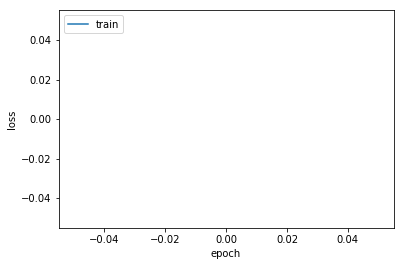

In [6]:
import keras
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

# 손실 이력 클래스 정의
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.val_losses = []        

    def on_batch_end(self, batch, logs={}):
        print(logs.keys())
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))

# 1. 데이터셋 준비하기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=28*28))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
history = LossHistory() # 손실 이력 객체 생성
model.fit(X_train, Y_train, epochs=5, batch_size=32, validation_data = (X_test, Y_test), callbacks=[history]) # 콜백으로 손실 이력 객체 지정

%matplotlib inline
import matplotlib.pyplot as plt

#plt.plot(history.losses)
plt.plot(history.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

---

### 결론

저는 딥러닝 모델을 처음 접할 때 어떻게 학습되는 지 이해하기가 쉽지 않았습니다. 나중에 이해를 한 뒤에는 사람이 학습하는 방식과 크게 다를 바가 없다는 것을 알게 되었습니다. 그리고 데이터셋을 어떻게 설계할 것인 지, 어떻게 검증을 해야될 것인지도 중요한 요소입니다. 학생이 어떤 학습지로 공부를 해야할 지 어떤 기준으로 평가를 해야할지가 중요한 것 처럼 말입니다. 공부를 잘하는 비법 책도 많은 것 처럼 딥러닝 모델도 학습 방법에 대해서 연구가 많이 되고 있습니다.

---

### 같이 보기

* [강좌 목차](https://tykimos.github.io/Keras/lecture/)
* 이전 : [딥러닝 이야기/케라스 이야기](https://tykimos.github.io/Keras/2017/01/27/Keras_Talk/)
* 다음 : [딥러닝 이야기/평가 이야기](https://tykimos.github.io/Keras/2017/05/22/Evaluation_Talk/)